(ref:lec5:ex0_sol)=
# Solutions of Exercise 5.0


Consider the control system in {numref}`fig:lec:ex0_sol:block`, where $n(t)$ is the sinusoidal measurement noise $n(t) = \sin(50 t)$.

```{figure} res/ex0-block.svg
---
width: 600px
name: fig:lec:ex0_sol:block
---
Block diagram of the control system
```


1. Assume that $F(s)=1$. How much is the closed-loop attenuating the measurement noise?
2. Design a proportional controller $F(s) = K$, with $K >0$, that achieves a measurement noise attenuation factor of $10$.

```{admonition} 3. Bonus
:class: alert-success

Design $F(s)=\frac{\alpha}{s + \alpha}$, with $\alpha > 0$, such that

- The crossover frequency is at least $10$ rad/s
- The phase margin is at least $50^\circ$
- The attenuation factor is $10$
```


```{admonition} Tip
:class: hint

Based on the Bode plot of $G(s)$ reported in {numref}`fig:lec5:ex0_sol:bode`, sketch the complementary sensitivity function's magnitude plot.
```

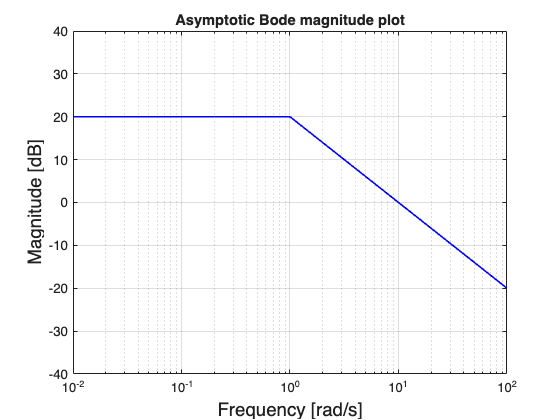

In [2]:
G = tf(10, [1, 1]);
if ~exist('asymptotic_bodemag')
    urlwrite('https://raw.githubusercontent.com/bonassifabio/1RT485/refs/heads/main/book/res/matlab/asymptotic_bodemag.m', 'asymptotic_bodemag.m');
end

asymptotic_bodemag(G); ylim([-40, 40])

---

## Solution

From Lecture 7, we know that the transfer function between the noise $N(s)$ and the output $Y(s)$ is the **complementary sensitivity function** $T(s)$

$$
T(s) \equiv \frac{Y(s)}{N(s)} = - \frac{F(s)G(s)}{1+ F(s)G(s)}
$$

For proportional controllers $F(s) = K$, replacing $G(s)$ we get

$$
T(s) = -\frac{K \frac{10}{s+1}}{1 + K \frac{10}{s+1}} = -\frac{10 K}{s + 10K + 1}
$$

We can also sketch the asymptotic magnitude Bode plot of $T(s)$ using the rule

$$
\lvert T(i \omega) \lvert_{\text{dB}} \approx \begin{dcases}
    0 \text{ dB } & \text{for } \omega < \omega_c \\
    \lvert G_o(i \omega) \lvert_{\text{dB}} &  \text{for } \omega > \omega_c
\end{dcases}
$$ (eq:lec5:ex0_sol:complementary_sensitivity)

Since $T(s)$ is stable for any $K>0$, the effect of $n(t) = \sin(50t)$ on the output $y(t)$ is described by $\lvert T(i50) \lvert$. In particular, the **attenuation factor is defined** as $\frac{1}{\lvert T(i50) \lvert}$.

There are two ways to compute $\lvert T(i50) \lvert$. We will start from the approach based on Bode plot for both Question 1 and 2, as it is simpler, and then embark in the analytical solution.

### Question 1

We can easily compute $\lvert T(i 50) \lvert_{\text{dB}}$ using the sketching rule {eq}`eq:lec5:ex0_sol:complementary_sensitivity`. Note that in this case we do have the Bode plot of $\lvert G_o(i \omega) \lvert$: it is the same as the Bode plot og $G(i \omega)$ because $K=1$.

Doing so, we obtain the Bode plot in {numref}`fig:lec5:ex0_sol:compsens_1`.

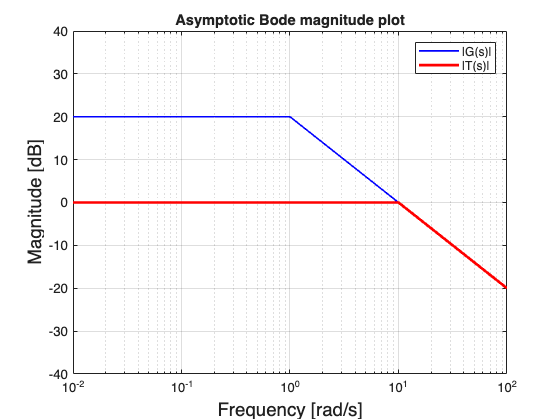

In [3]:
[w1, Go1] = asymptotic_bodemag(G); 
hold on;
idx = find(abs(Go1) <= 1e-3, 1, 'first');

% If zero is never reached, stop at the end
if isempty(idx)
    idx = length(Go1);
end

% Build modified magnitude
sensitivity = zeros(size(Go1));
sensitivity(idx+1:end) = Go1(idx+1:end);
plot(w1, sensitivity, 'Color', 'r', 'LineWidth', 2);
legend('|G(s)|', '|T(s)|');
% plot([50, 50], [-40, -13.5], '--k', 'LineWidth', 1.25);
ylim([-40, 40])

From this, we can note that $\lvert T(i 50) \lvert_{\text{dB}} \approx -13$ dB or, equivalently, $\lvert T(i 50) \lvert = 10^{\frac{-13}{20}} \approx 0.22$.

This means that a sinusoidal measurement noise with amplitude $1$ at $50$ rad/s will cause the output to oscillate with amplitude $0.22$ at the same frequency. In this case, we say that the measurement noise is attenuated by a factor $\frac{1}{0.22} \approx 4.5$.

### Question 2

Let's sart by observing that an attenuation factor of $10$ corresponds to $\lvert T(i 50) \lvert_{dB }= -20$ dB. From the sketch of complementary sensitivity for $K=1$ in {numref}`fig:lec5:ex0_sol:compsens_1`, we can note that 
- $\lvert T(i 50) \lvert_{\text{dB}} = - 13$ dB
- The current crossover frequency is $\omega_c = 10$ rad/s, which is smaller than the noise of the measuement noise ($50$ rad/s).

Because $50 > \omega_c$, $\lvert T(i 50) \lvert_{\text{dB}} = \lvert G_o(i 50) \lvert_{\text{dB}} = \lvert K \lvert_{dB} + \lvert G(i 50) \lvert_{dB} =  \lvert K \lvert_{dB} - 13$ dB.

To reduce it to $-20$ dB, it is enough to select $\lvert K \lvert_{\text{dB}} = -7$ dB, that is, $\boxed{K = 10^{\frac{-7}{20}} = 0.44}$. 

We can double-check this result, by sketching $\lvert T(i \omega) \lvert_{\text{dB}}$ as follows:
- Sketch $\lvert G_o(i \omega) \lvert_{\text{dB}}$ by moving decreasing the Bode plot of $G(s)$ by $7$ dB.
- Apply {eq}`eq:lec5:ex0_sol:complementary_sensitivity` with this $\lvert G_o(i \omega) \lvert_{\text{dB}}$.

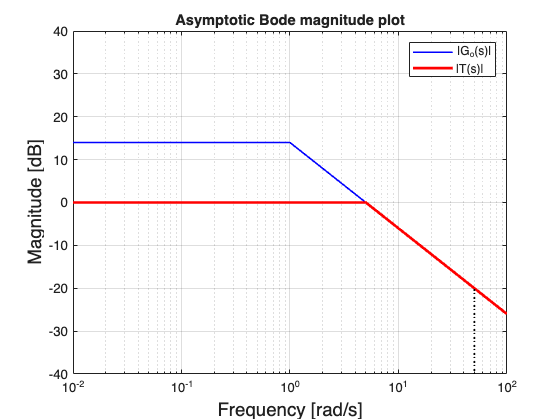

In [4]:
[w1, Go2] = asymptotic_bodemag(0.5*G);  
hold on;
idx = find(abs(Go2) <= 1e-3, 1, 'first');

% If zero is never reached, stop at the end
if isempty(idx)
    idx = length(Go2);
end

% Build modified magnitude
sensitivity = zeros(size(Go2));
sensitivity(idx+1:end) = Go2(idx+1:end);
plot(w1, sensitivity, 'Color', 'r', 'LineWidth', 2);
plot([50, 50], [-40, -20], ':k', 'LineWidth', 1.25);
legend('|G_o(s)|', '|T(s)|');
ylim([-40, 40])

Note that any $\boxed{0 < K \leq 0.44}$ works, since decreasing $K$ will cause $\lvert G_o(i \omega) \lvert_{\text{dB}}$ to move further down.

```{admonition} The price for attenuation
:class: note

As you can easily note in the plot below, the price of this increased attenuation is the halving of the crossover frequency (and, hence, of the closed-loop bandwidth)!
```

### Analytical solutions


Let us derive the analytical expression of the complementary sensitivity at $50$ rad/s, as a function of the proportional controller gain $K$: 

$$
\lvert T(i50) \lvert = \left\lvert \frac{10K}{i 50 + 10K +1} \right\lvert = \left\lvert \frac{10K}{10K +1 + i50}\cdot\frac{10K + 1 - i50}{10 K + 1 - i50} \right\lvert  = \left\lvert \frac{100K^2 + 10K - i500K}{(10K +1)^2 + 50^2}\right\lvert
$$ 

We now isolate the real part from the imaginary part

$$
\lvert T(i50) \lvert = \left\lvert \frac{100K^2 + 10K}{(10K +1)^2 + 50^2} - i \frac{500K}{(10K +1)^2 + 50^2} \right\lvert
$$ 

The modulus is then

$$
\lvert T(i50) \lvert = \sqrt{\left( \frac{100K^2 + 10K}{(10K +1)^2 + 50^2} \right)^2 + \left( \frac{500K}{(10K +1)^2 + 50^2} \right)^2}
$$ (eq:lec5:ex0_sol:T_modulus)


#### Question 1 - $K=1$

To solve Question 1, we just replace $K=1$ in {eq}`eq:lec5:ex0_sol:T_modulus`. Doing so, we obtain:

$$
\lvert T(i 50) \lvert = \sqrt{\left(\frac{110}{2621} \right)^2 + \left( \frac{500}{2621} \right)^2 } \approx 0.2 
$$

This corresponds to an attenuation factor of $\frac{1}{0.2} \approx 5$.

#### Question 2

We need to compute for what values of $K$ {eq}`eq:lec5:ex0_sol:T_modulus` is smaller than $0.1$, so that the attenuation factor is (at least) $10$. This inequality is really nasty, because if we try to evaluate the squares a fourth order term $K^4$ appears. Instead of solving it explicitly, we can try probing different values of $K$ to numerically find one that makes $\lvert T(i 50) \lvert \approx 0.1$. Note that the calculation of $\lvert T(i 50) \lvert$ for different values of $K$ can be easily automated with a programmable calculator!

In [5]:
function print_modulus_T(K)
    term_1 = (100*K^2 + 10*K) / ((10*K+1)^2 +50^2);
    term_2 =500*K / ((10*K+1)^2 +50^2);
    T = sqrt(term_1^2 + term_2^2);
    disp(sprintf('For K=%.2f\t|T(i50)| = %.3f\n', K, T));
end

print_modulus_T(1);
print_modulus_T(0.1);
print_modulus_T(0.5);

For K=1.00	|T(i50)| = 0.195

For K=0.10	|T(i50)| = 0.020

For K=0.50	|T(i50)| = 0.099



Bingo! From here, we can deduce $K=0.5$ satisfies the requirement

```{admonition} Warning
:class: warning

This numerical method does not guarantee that any $K < 0.5$ satisfies the requirement!
```

### Question 3

We now use the controller $F(s) = \frac{\alpha}{s + \alpha}$. Let's start by noting that the static gain of this controller is $1$. In fact, it can be re-written as

$$
F(s) = \frac{1}{\tau s + 1} \quad \text{where } \tau = \frac{1}{\alpha}
$$

The Bode plot of the open-loop transfer function $G_o(s)$ will be the same as $G(s)$ for $\omega < - \alpha$. After the pole in $s = - \alpha$, its slope will decrease by an additional $-20$ dB/decade.

This additional negative slope is really useful for reducing the effect of measurement noise at frequencies higher than $\alpha$, as $\lvert T(i \omega) \lvert_{\text{dB}}$ will be even lower, thereby attenuating the effect of high-frequency noise. Let's go for $\alpha = 10$, plotting $\lvert G_o(i \omega) \lvert_{\text{dB}}$ and the corresponding $\lvert T(i \omega) \lvert_{\text{dB}}$ obtained with the approximation {eq}`eq:lec5:ex0_sol:complementary_sensitivity` 

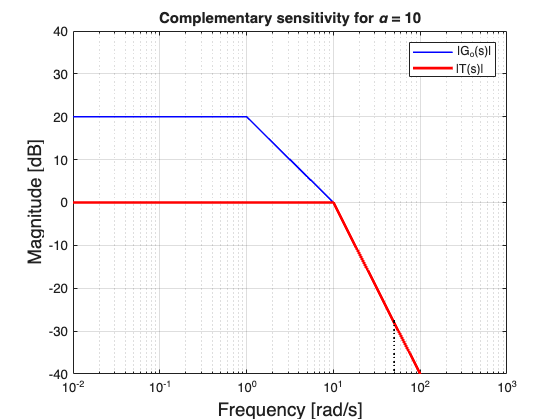

In [17]:
s = tf('s');
F = 10 / (s+10);
[w3, Go3] = asymptotic_bodemag(F*G);  
hold on;
idx = find(abs(Go3) <= 1e-3, 1, 'first');

% If zero is never reached, stop at the end
if isempty(idx)
    idx = length(Go3);
end

% Build modified magnitude
sensitivity = zeros(size(Go3));
sensitivity(idx+1:end) = Go3(idx+1:end);
plot(w3, sensitivity, 'Color', 'r', 'LineWidth', 2);
plot([50, 50], [-40, -27], ':k', 'LineWidth', 1.25);
legend('|G_o(s)|', '|T(s)|');
title('Complementary sensitivity for \alpha = 10')
ylim([-40, 40])

With this choice:
- $\omega_c \approx 10$ rad/s, because $G_o(s)$ crosses the 0dB axis at 10 rad/s.
- $\lvert T(i50) \lvert_{\text{dB}} \approx -26$ dB, so the attenuation factor will be $\frac{1}{10^{\frac{\lvert T(i50) \lvert_{\text{dB}}}{20}}} = 10^{\frac{26}{20}} = 20 > 10$.

We just have to check that the phase margin is larger than $50^\circ$:

$$
\varphi_m = 180 + \angle G_o(i \omega_c) = 180 - \textrm{atan} \left( \frac{\omega_c}{1} \right) - \textrm{atan} \left( \frac{\omega_c}{\alpha} \right)
$$

For $\omega_c = 10$ rad/s and $\alpha = 10$ the phase margin is $39^\circ$. This is insufficient!

Let's now try with $\alpha = 20$.

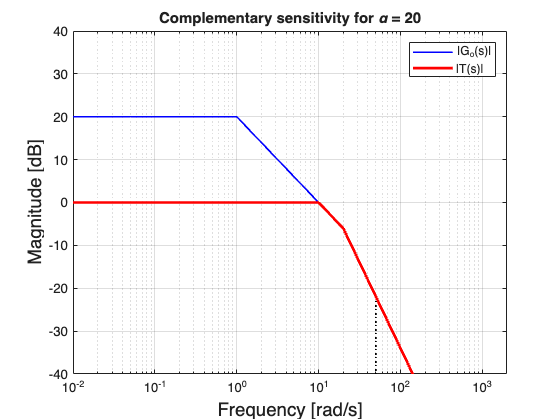

In [19]:
F = 20 / (s+20);
[w4, Go4] = asymptotic_bodemag(F*G);  
hold on;
idx = find(abs(Go4) <= 1e-3, 1, 'first');

% If zero is never reached, stop at the end
if isempty(idx)
    idx = length(Go4);
end

% Build modified magnitude
sensitivity = zeros(size(Go4));
sensitivity(idx+1:end) = Go4(idx+1:end);
plot(w4, sensitivity, 'Color', 'r', 'LineWidth', 2);
plot([50, 50], [-40, -23], ':k', 'LineWidth', 1.25);
legend('|G_o(s)|', '|T(s)|');
title('Complementary sensitivity for \alpha = 20')
ylim([-40, 40])

Now:
- The crossover frequency is still $\omega_c \approx 10$ rad/s
- $\lvert T(i50) \lvert_{\text{dB}} \approx -23$ dB, so the attenuation factor will be $\frac{1}{10^{\frac{\lvert T(i50) \lvert_{\text{dB}}}{20}}} = 10^{\frac{23}{20}} = 12.5 > 10$.
- The phase margin is $\varphi_m \approx 57^\circ$ which is larger than what we needed!

```{admonition} What's the catch?
:class: warning

This controller allows to achieve much better disturbance compensation with a larger bandwidth compared to {numref}`fig:lec5:ex0_sol:compsens_2`, at the price of a smaller phase margin (and hence, slightly larger closed-loop oscillations).

With the controller designed in {numref}`fig:lec5:ex0_sol:compsens_2`, the phase margin was approximately $90^\circ$!

```

#### Step response simulations

We can illustrate this trade-off by simply simulating the closed-loop acheived by $F(s) = 0.44$ and by $F(s) = \frac{20}{s + 20}$, when
- $r(t) = \text{step}(t)$, and
- $n(t) = \sin(50t)$

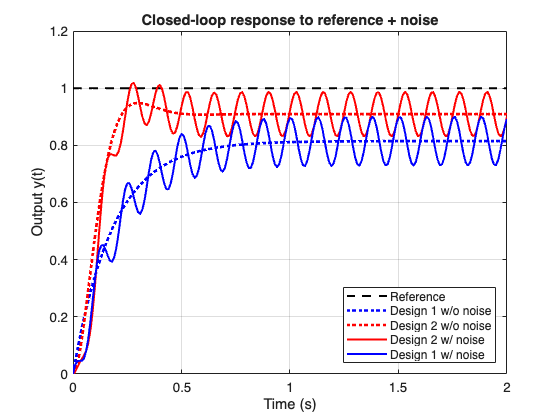

In [ ]:
F1 = 0.44;
F2 = 20 / (s+20);
Gc1 = F1*G / (1 + F1*G); % Gc1(s) = T1(s)
Gc2 = F2*G / (1 + F2*G); % Gc2(s) = T2(s)
figure;
t = 0:0.01:2;
R = 1 - sin(50 * t); % Reference signal - noise
R_nonoise = ones(size(t)); % Reference signal without noise
y1_nonoise = lsim(Gc1, R_nonoise, t);
y_1 = lsim(Gc1, R, t);
y2_nonoise = lsim(Gc2, R_nonoise, t);
y_2 = lsim(Gc2, R, t);
plot(t, R_nonoise, 'Color', 'k', 'LineStyle', '--', 'LineWidth', 1.5); hold on;
plot(t, y1_nonoise, 'Color', 'b', 'LineStyle', ':', 'LineWidth', 2); hold on;
plot(t, y2_nonoise, 'Color', 'r', 'LineStyle', ':', 'LineWidth', 2); 
plot(t, y_2, 'Color', 'r', 'LineWidth', 1.5);
plot(t, y_1, 'Color', 'b', 'LineWidth', 1.5); 
legend('Reference','Design 1 w/o noise', 'Design 2 w/o noise', 'Design 2 w/ noise', 'Design 1 w/ noise', 'Location', 'SouthEast');
title('Closed-loop responses');
xlabel('Time (s)'); ylabel('Output y(t)');
xlim([0, t(end)]); grid on;